In [1]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np


# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Train dataframe

In [5]:
train_df = pd.read_csv("c:/users/ali/desktop/projects/prj3/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head(5)

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


## Test DataFrame

In [8]:
test_df = pd.read_csv("c:/users/ali/desktop/projects/prj3/test.csv")
print('test_df Shape:', test_df.shape)
test_df.head(5)

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Transform Categorical data into numerical data

In [9]:
train_df = pd.get_dummies(train_df,columns=['SubscriptionType','PaymentMethod','ContentType','DeviceRegistered','GenrePreference'])
train_df = pd.get_dummies(train_df,columns=['PaperlessBilling','MultiDeviceAccess','ParentalControl','SubtitlesEnabled','Gender'],drop_first= True)
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,PaperlessBilling_Yes,MultiDeviceAccess_Yes,ParentalControl_Yes,SubtitlesEnabled_Yes,Gender_Male
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,...,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232,...,0.199724,0.201241,0.199945,0.200811,0.198280,0.499645,0.499420,0.500786,0.501175,0.499850
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211,...,0.399793,0.400929,0.399960,0.400607,0.398705,0.500001,0.500001,0.500000,0.500000,0.500001
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
test_df = pd.get_dummies(test_df,columns=['SubscriptionType','PaymentMethod','ContentType','DeviceRegistered','GenrePreference'])
test_df = pd.get_dummies(test_df,columns=['PaperlessBilling','MultiDeviceAccess','ParentalControl','SubtitlesEnabled','Gender'],drop_first= True)
test_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,PaperlessBilling_Yes,MultiDeviceAccess_Yes,ParentalControl_Yes,SubtitlesEnabled_Yes,Gender_Male
count,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,...,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000
mean,60.064692,12.474347,748.167669,20.489914,92.646128,24.450900,3.000958,4.507705,12.040400,0.334571,...,0.199569,0.200459,0.201627,0.199110,0.199234,0.496899,0.501407,0.497320,0.500182,0.499177
std,34.285025,4.331734,520.782838,11.243173,50.631406,14.451309,1.154689,2.876700,7.204115,0.471843,...,0.399679,0.400346,0.401217,0.399333,0.399426,0.499993,0.500000,0.499995,0.500002,0.500002
min,1.000000,4.990051,5.019144,1.000528,5.000985,0.000000,1.000016,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,8.725621,328.961543,10.767551,48.554662,12.000000,2.000577,2.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,12.453073,649.385029,20.472305,92.533168,25.000000,2.997293,5.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,90.000000,16.214247,1081.266991,30.196107,136.622615,37.000000,4.000671,7.000000,18.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,119.000000,19.989797,2376.235183,39.999296,179.999785,49.000000,4.999930,9.000000,24.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature scaling

In [13]:
train = train_df
test = test_df

In [14]:
train.AccountAge = (train.AccountAge-min(train.AccountAge))/(max(train.AccountAge)-min(train.AccountAge))
train.MonthlyCharges = (train.MonthlyCharges-min(train.MonthlyCharges))/(max(train.MonthlyCharges)-min(train.MonthlyCharges))
train.TotalCharges = (train.TotalCharges-min(train.TotalCharges))/(max(train.TotalCharges)-min(train.TotalCharges))
train.ViewingHoursPerWeek = (train.ViewingHoursPerWeek-min(train.ViewingHoursPerWeek))/(max(train.ViewingHoursPerWeek)-min(train.ViewingHoursPerWeek))
train.AverageViewingDuration = (train.AverageViewingDuration-min(train.AverageViewingDuration))/(max(train.AverageViewingDuration)-min(train.AverageViewingDuration))
train.ContentDownloadsPerMonth = (train.ContentDownloadsPerMonth-min(train.ContentDownloadsPerMonth))/(max(train.ContentDownloadsPerMonth)-min(train.ContentDownloadsPerMonth))
train.UserRating = (train.UserRating-min(train.UserRating))/(max(train.UserRating)-min(train.UserRating))
train.AccountAge = (train.AccountAge-min(train.WatchlistSize))/(max(train.WatchlistSize)-min(train.WatchlistSize))

In [15]:
test.AccountAge = (test.AccountAge-min(test.AccountAge))/(max(test.AccountAge)-min(test.AccountAge))
test.MonthlyCharges = (test.MonthlyCharges-min(test.MonthlyCharges))/(max(test.MonthlyCharges)-min(test.MonthlyCharges))
test.TotalCharges = (test.TotalCharges-min(test.TotalCharges))/(max(test.TotalCharges)-min(test.TotalCharges))
test.ViewingHoursPerWeek = (test.ViewingHoursPerWeek-min(test.ViewingHoursPerWeek))/(max(test.ViewingHoursPerWeek)-min(test.ViewingHoursPerWeek))
test.AverageViewingDuration = (test.AverageViewingDuration-min(test.AverageViewingDuration))/(max(test.AverageViewingDuration)-min(test.AverageViewingDuration))
test.ContentDownloadsPerMonth = (test.ContentDownloadsPerMonth-min(test.ContentDownloadsPerMonth))/(max(test.ContentDownloadsPerMonth)-min(test.ContentDownloadsPerMonth))
test.UserRating = (test.UserRating-min(test.UserRating))/(max(test.UserRating)-min(test.UserRating))
test.AccountAge = (test.AccountAge-min(test.WatchlistSize))/(max(test.WatchlistSize)-min(test.WatchlistSize))

## Choose the most important features (optional)

for me i didn't use it because i was working of AUC and ROC, but you can use if you are willing to get more accuracy

METHOD 1 :

[0.07878176 0.06364004 0.06101523 0.06679917 0.07147688 0.06598797
 0.05387654 0.05171786 0.05255473 0.01082835 0.00900625 0.01254105
 0.01543994 0.0112399  0.01428978 0.01469536 0.01724932 0.01796016
 0.01819905 0.01912617 0.01907775 0.01890277 0.01912034 0.01268772
 0.01540628 0.01661769 0.01623678 0.01558104 0.02890827 0.02881797
 0.02828643 0.02563443 0.02829703]


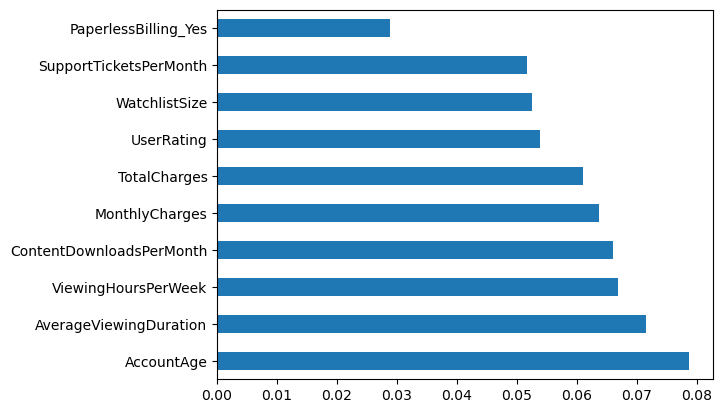

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

METHOD 2 :

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                        Specs        Score
7      SupportTicketsPerMonth  3156.099291
4      AverageViewingDuration   878.693493
5    ContentDownloadsPerMonth   710.907048
3         ViewingHoursPerWeek   670.615241
2                TotalCharges   547.381167
8               WatchlistSize   495.962217
1              MonthlyCharges   409.653819
10   SubscriptionType_Premium   185.532801
13  PaymentMethod_Credit card   147.915865
9      SubscriptionType_Basic   127.672634


CHOOSE THE FEATURES TO DROP :

In [ ]:
train = train.drop(['UserRating', 
       'SubscriptionType_Standard', 'PaymentMethod_Bank transfer', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'ContentType_Both', 'ContentType_Movies',
       'ContentType_TV Shows', 'DeviceRegistered_Computer',
       'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
       'DeviceRegistered_Tablet', 'GenrePreference_Action',
       'MultiDeviceAccess_Yes','GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy'],axis=1)

In [ ]:
test = test.drop(['UserRating',
       'SubscriptionType_Standard', 'PaymentMethod_Bank transfer', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'ContentType_Both', 'ContentType_Movies',
       'ContentType_TV Shows', 'DeviceRegistered_Computer',
       'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
       'DeviceRegistered_Tablet', 'GenrePreference_Action',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'MultiDeviceAccess_Yes' ,'GenrePreference_Fantasy'],axis=1)

for me i choose only the 10th important features and i dropped the others

## Getting the data ready

In [19]:
X_train = train.drop(['CustomerID', 'Churn'], axis=1)
Y_train = train.Churn

## Chosing the model 

i used logistic regression because i was focussing on AUC and ROC , but if you are focussing on accuracy i recommend decision tree ensemble

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
x_testt = test.drop(['CustomerID'], axis=1)

We also did feature scaling for optimal performance of our algorithm suing the StandardScaler class

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(x_testt)

In [23]:
lr = LogisticRegression(C=10**2, random_state=0)
lr.fit(X_train_std, Y_train)

LogisticRegression(C=100, random_state=0)

lr = LogisticRegression(C=10**2, random_state=0), here the C represent the regularization 

## Probability

In [24]:
predicted_probability = lr.predict_proba(X_test_std)[:, 1]

In [25]:
# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [26]:
import random 
random.seed(42)
print(prediction_df.shape)
prediction_df.head(20)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.106339
1,LFR4X92X8H,0.040620
2,QM5GBIYODA,0.408333
3,D9RXTK2K9F,0.045013
4,ENTCCHR1LR,0.133120
5,7A88BB5IO6,0.464705
6,70OMW9XEWR,0.120678
7,EL1RMFMPYL,0.290779
8,4IA2QPT6ZK,0.202253
9,AEDCWHSJDN,0.179557


In [27]:
prediction_df.to_csv("prediction_submission.csv", index=False)